In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [2]:
wine: pd.DataFrame = pd.read_csv('../data/raw_data/wine.zip', compression='zip')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
target = wine['quality']
wine_features = wine.drop(columns=['quality'], axis=1)

In [5]:
wine_train, wine_test, target_train, target_test = train_test_split(wine_features, target, test_size=0.2, random_state=228)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

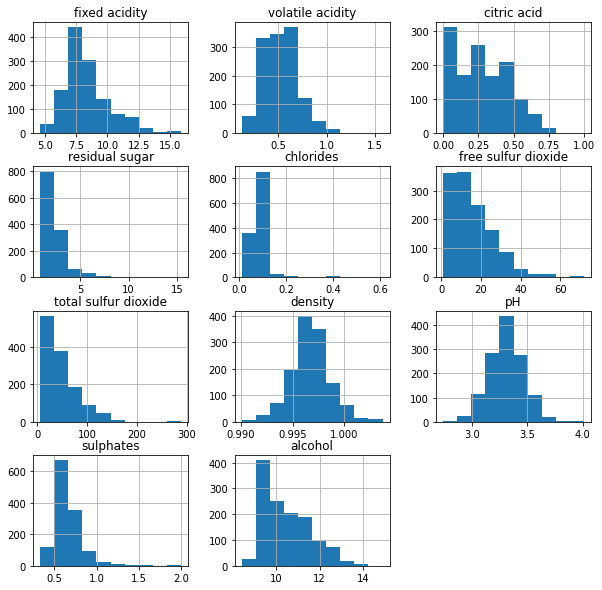

In [6]:
wine_train.hist(figsize=(10, 10))

In [7]:
max_abs_scaler = MaxAbsScaler()
wine_train_scaled = max_abs_scaler.fit_transform(wine_train)
wine_test_scaled = max_abs_scaler.transform(wine_test)

wine_train_scaled = pd.DataFrame(wine_train_scaled, columns = wine_train.columns)
wine_test_scaled = pd.DataFrame(wine_test_scaled, columns = wine_test.columns)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

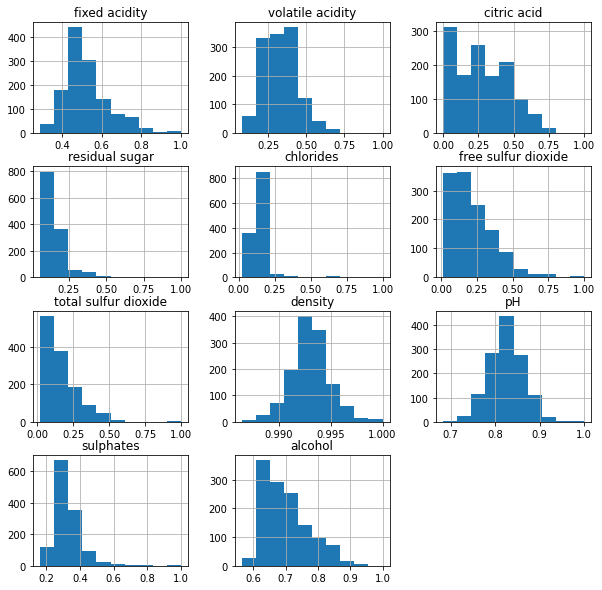

In [8]:
wine_train_scaled.hist(figsize=(10,10))

In [9]:
wine_train_scaled['quality'] = target_train.values
wine_test_scaled['quality'] = target_test.values

In [10]:
compression_opts_train = dict(method='zip',
                        archive_name='wine_train.csv')  
wine_train_scaled.to_csv('../data/preprocessed_data/wine_train.zip', index=False, compression=compression_opts_train)

compression_opts_test = dict(method='zip',
                        archive_name='wine_test.csv')  
wine_test_scaled.to_csv('../data/preprocessed_data/wine_test.zip', index=False, compression=compression_opts_test)